In [106]:
%matplotlib inline
import numpy as N
import matplotlib.pyplot as P
import time
import os
import matplotlib.cm as cm
from prefig import *
from scipy.stats import kde
import matplotlib.colors as mcolors
from scipy.stats import mode
from scipy.interpolate import interp2d
from astropy.table import Table, Column, MaskedColumn, vstack

In [24]:
data = Table.read('gz2_gz1_extra_galex_matched_data.fits', format='fits')

In [111]:
h = data
d = h[h['t01_smooth_or_features_a02_features_or_disk_debiased'] >= 0.8]
s = h[h['t01_smooth_or_features_a01_smooth_debiased'] >=0.8]

h = vstack([d, s])
pc = h[N.where(h['IVAN_DENSITY'] < -0.8)]
blue = pc[pc["MU_MR"] < pc["lower_GV"]]
red = pc[pc["MU_MR"] > pc["upper_GV"]]
green = pc[N.where(N.logical_and(pc['MU_MR'] < pc["upper_GV"], pc['MU_MR'] > pc["lower_GV"]))]

In [112]:
print len(blue)
print len(green)
print len(red)

5504
1002
794


In [25]:
print N.min(data["IVAN_DENSITY"])
data = data[data['IVAN_DENSITY'] > -50]
print len(data)

-999.0
86967


In [26]:
field = data[data['IVAN_DENSITY'] < -0.8]

In [27]:
cluster = data[data['IVAN_DENSITY'] > 0.8]

(array([ 2084.,  1597.,  1099.,   726.,   518.,   271.,   147.,    70.,
           33.,    10.]),
 array([ 0.80010003,  0.95124003,  1.10238004,  1.25352004,  1.40466005,
         1.55580005,  1.70694005,  1.85808006,  2.00922006,  2.16036007,
         2.31150007]),
 <a list of 10 Patch objects>)

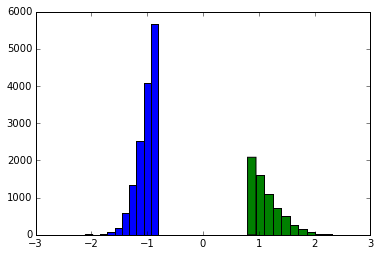

In [30]:
P.hist(field['IVAN_DENSITY'])
P.hist(cluster['IVAN_DENSITY'])

In [83]:
Hf, Xf, Yf = N.histogram2d(field['MR'], field["MU_MR"], bins=25, range=([-24, -18.0],[0.5, 3.0]))

In [84]:
Hc, Xc, Yc = N.histogram2d(cluster['MR'], cluster["MU_MR"], bins=25, range=([-24, -18.0],[0.5, 3.0]))

In [85]:
Mr = N.linspace(-24, -16, 50)
C_dash = 2.06 - 0.244*N.tanh((Mr + 20.07)/1.09)
lower = C_dash - 0.128
upper = C_dash + 0.128

(-18, -24)

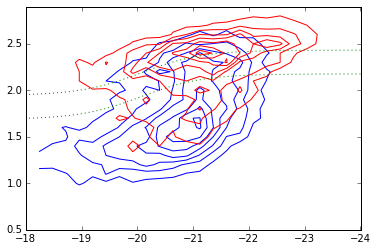

In [88]:
P.contour(Xf[:-1], Yf[:-1], Hf.T, origin='lower', colors='b')
P.contour(Xc[:-1], Yc[:-1], Hc.T, origin='lower', colors='r')
P.plot(Mr, upper, c='g', linestyle='dotted')
P.plot(Mr, lower, c='g', linestyle='dotted')
P.xlim((-18, -24))

In [94]:
Hf, Xf, Yf = N.histogram2d(field['MU_MR'], field["NUV_U"], bins=25, range=([0.5,3], [-0.5,5]))
Hc, Xc, Yc = N.histogram2d(cluster['MU_MR'], cluster["NUV_U"], bins=25, range=([0.5,3], [-0.5,5]))

(-1, 5)

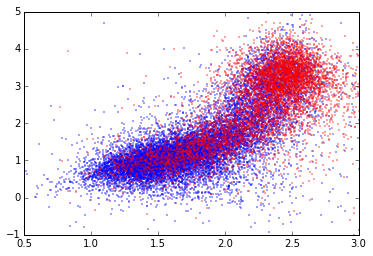

In [103]:
#P.contour(Xf[:-1], Yf[:-1], Hf.T, origin='lower', colors='b')
#P.contour(Xc[:-1], Yc[:-1], Hc.T, origin='lower', colors='r')
# P.plot(Mr, upper, c='g', linestyle='dotted')
# P.plot(Mr, lower, c='g', linestyle='dotted')
P.scatter(field['MU_MR'], field['NUV_U'], color='b', marker='x', s=1, alpha=0.5)
P.scatter(cluster['MU_MR'], cluster["NUV_U"], color='r', marker='x', s=1, alpha=0.5)
P.xlim(0.5, 3)
P.ylim(-1,5)

In [60]:
field_nb = field[field['MU_MR'] > field['lower_GV']] 

In [63]:
cluster_nb = cluster[cluster['MU_MR'] > cluster['lower_GV']]

In [65]:
len(cluster_nb)

4835

In [66]:
len(field_nb)

4413

In [76]:
Hf, Xf, Yf = N.histogram2d(field_nb['MR'], field_nb["MU_MR"], bins=25, range=([-24, -18.5],[1.5, 3.0]))

In [77]:
Hc, Xc, Yc = N.histogram2d(cluster_nb['MR'], cluster_nb["MU_MR"], bins=25, range=([-24, -18.5],[1.5, 3.0]))

(-18, -24)

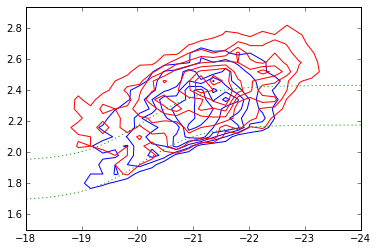

In [79]:
P.contour(Xf[:-1], Yf[:-1], Hf.T, origin='lower', colors='b')
P.contour(Xc[:-1], Yc[:-1], Hc.T, origin='lower', colors='r')
P.plot(Mr, upper, c='g', linestyle='dotted')
P.plot(Mr, lower, c='g', linestyle='dotted')
P.xlim(-18, -24)